# Part1. Exploratory Data Analysis(Eda)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('./data/train.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isnull().sum() # checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- age, cabin, embarked가 Null값이 있음

## 얼마나 살아남았는가 ?

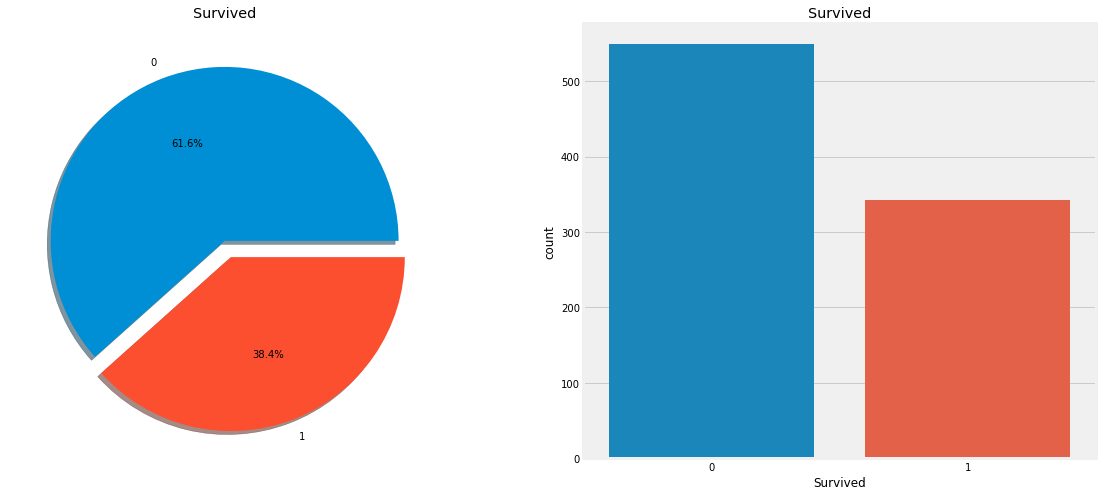

In [4]:
f, ax = plt.subplots(1, 2, figsize= (18,8))

data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%', ax= ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

# 변수 타입 확인

- Categorical Features ( 명목형 변수 )
- Oridinary Features ( 순서가 있는 변수 )
- Continuous Feature ( 연속형 변수 ) 


# Sex -> Categorical Feature


In [5]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

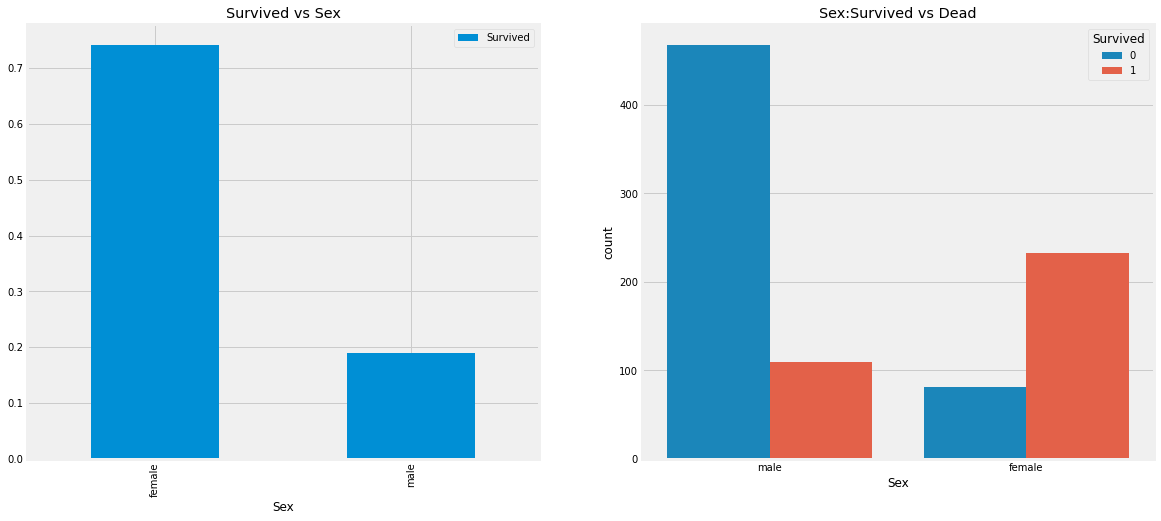

In [6]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['Sex', 'Survived']].groupby('Sex').mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue = 'Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')

plt.show()

# Pclass -> Ordinary Feature


In [7]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient('Blues_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


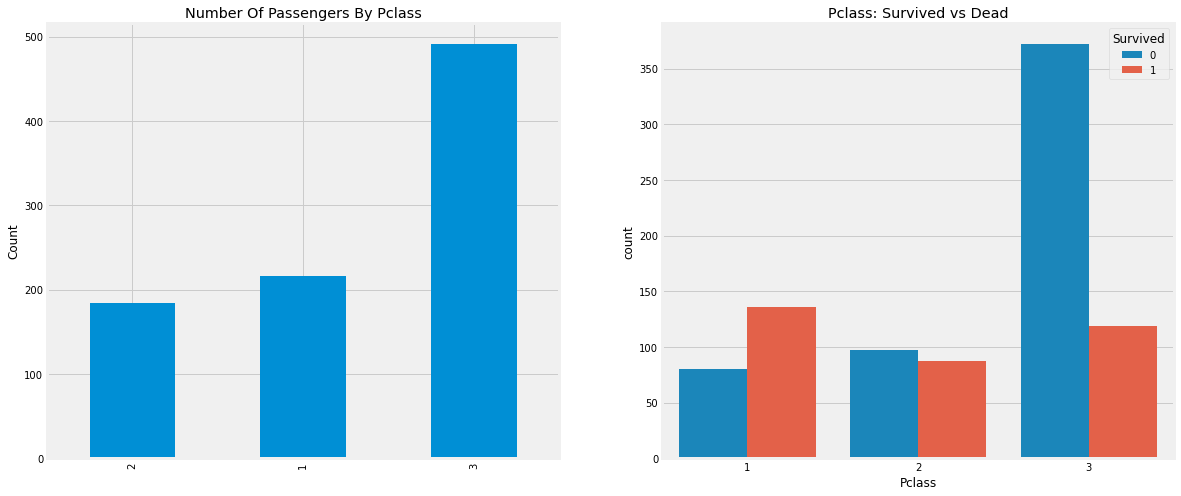

In [8]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data['Pclass'].value_counts().sort_values().plot.bar(ax= ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived' ,data=data, ax= ax[1])
ax[1].set_title('Pclass: Survived vs Dead')

plt.show()

In [9]:
pd.crosstab([data.Sex, data.Survived],data.Pclass, margins=True).style.background_gradient('summer_r')

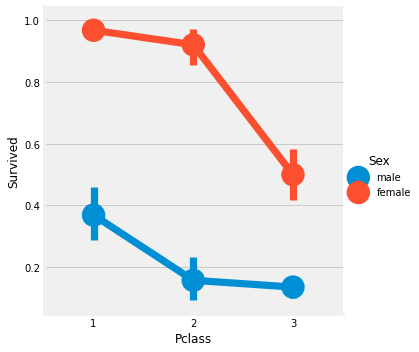

In [10]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data=data)
plt.show()

- factorplot은 카테고리컬 변수를 구분하여 보기 편하게 시각화 가능!!!

# Age -> Continuous Feature

In [11]:
print('Max age : {:.2f} years'.format(data['Age'].max()))
print('Mean age : {:.2f} years'.format(data['Age'].mean()))
print('Min age : {:.2f} years'.format(data['Age'].min()))

Max age : 80.00 years
Mean age : 29.70 years
Min age : 0.42 years


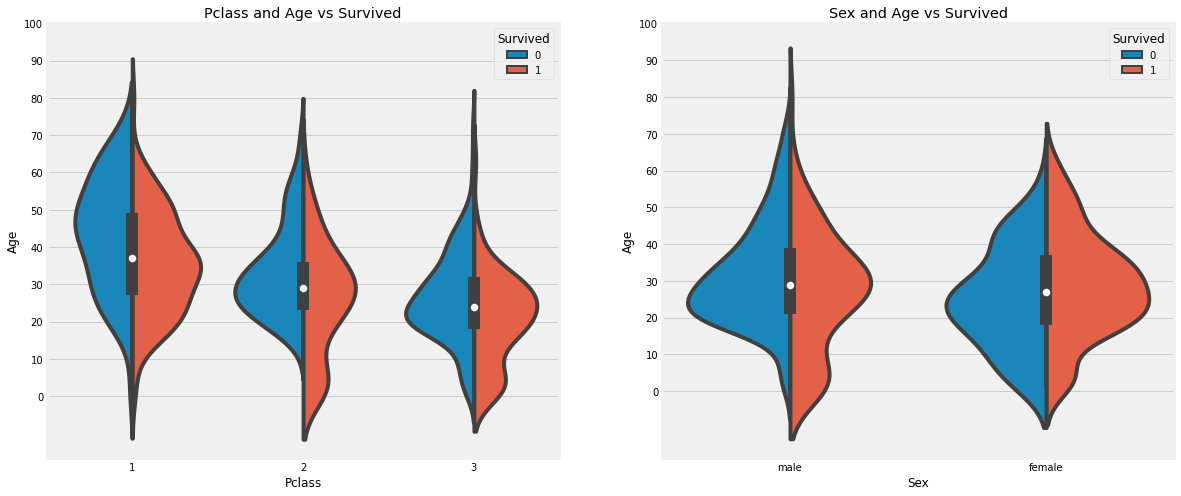

In [12]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot('Pclass', 'Age', hue = 'Survived', data=data, split=True,ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue = 'Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

### 관찰 내용

    - 1. AGE가 어릴수록 Pclass 낮다.
    - 2. 탑승객의 생존 기회는 20~50 (Pclass1)이 높다.
    - 3. 남자의 경우, 생존기회는 나이가 많아질수록 적다.


## name feature을 통해 Age Null값 처리

In [13]:
data['Initial'] = 0

for i in data:
    data['Initial'] = data.Name.str.extract('([a-zA-Z]+)\.')
    

In [14]:
data['Initial'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Initial, dtype: int64

In [15]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],
                        inplace=True)

In [16]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

## Filling NaN Ages

In [17]:
## Assigning the NaN values with the Ceil values of the mean ages

data.loc[(data.Age.isnull()) & (data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial=='Other'), 'Age'] = 46

In [18]:
## age 변수 Null 값 확인

data.Age.isnull().all()

False

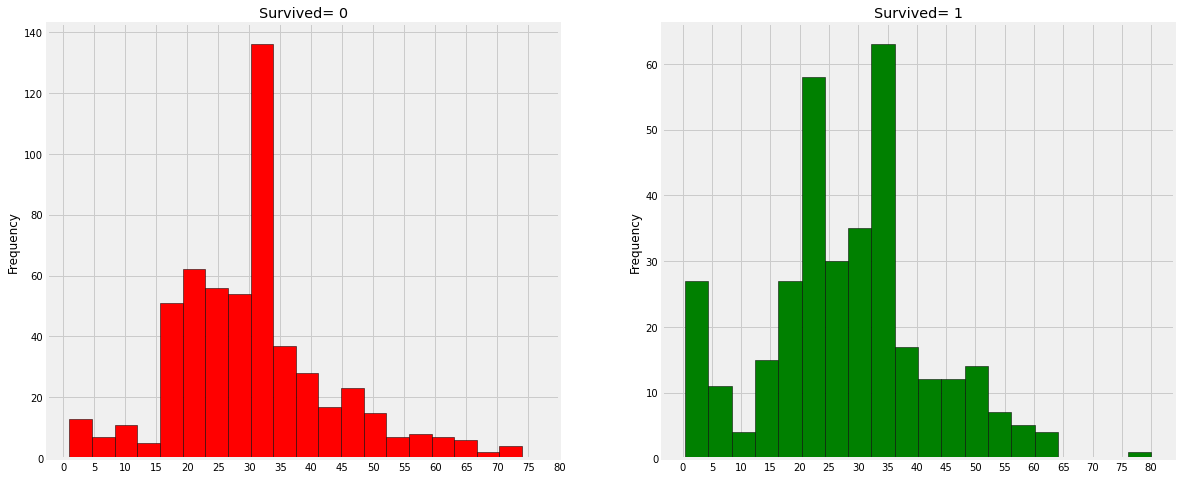

In [19]:
f, ax = plt.subplots(1, 2, figsize= (18, 8))

data[data['Survived'] == 0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0, 85, 5))
ax[0].set_xticks(x1)

data[data['Survived'] == 1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_title('Survived= 1')
x2=list(range(0, 85, 5))
ax[1].set_xticks(x2)

plt.show()

### Observation:

    - 1. AGE(<5)는 대부분 살았어 ( 여자, 아이 우선 !! )
    - 2. 75 이상의 사람들 (80살)은 거의 살았어
    - 3. 30~40세의 사람들이 가장 많이 죽었어

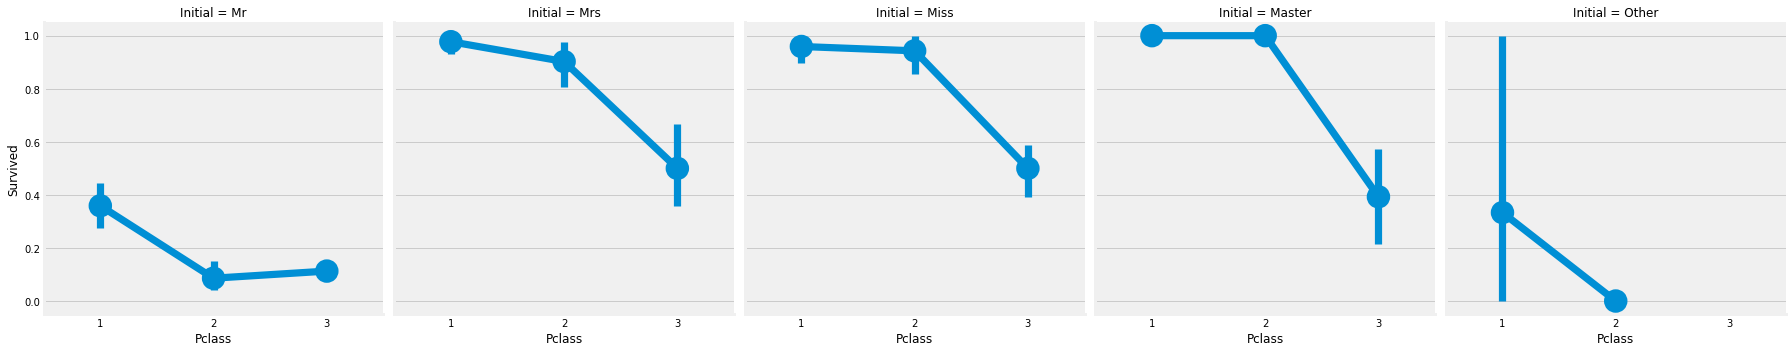

In [20]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)

plt.show()

# Embarked -> Categorical Value

In [21]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins = True).style.background_gradient('summer_r')

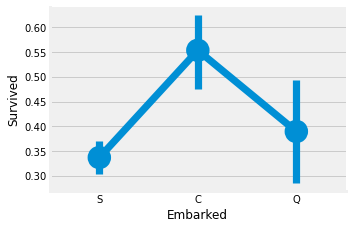

In [22]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

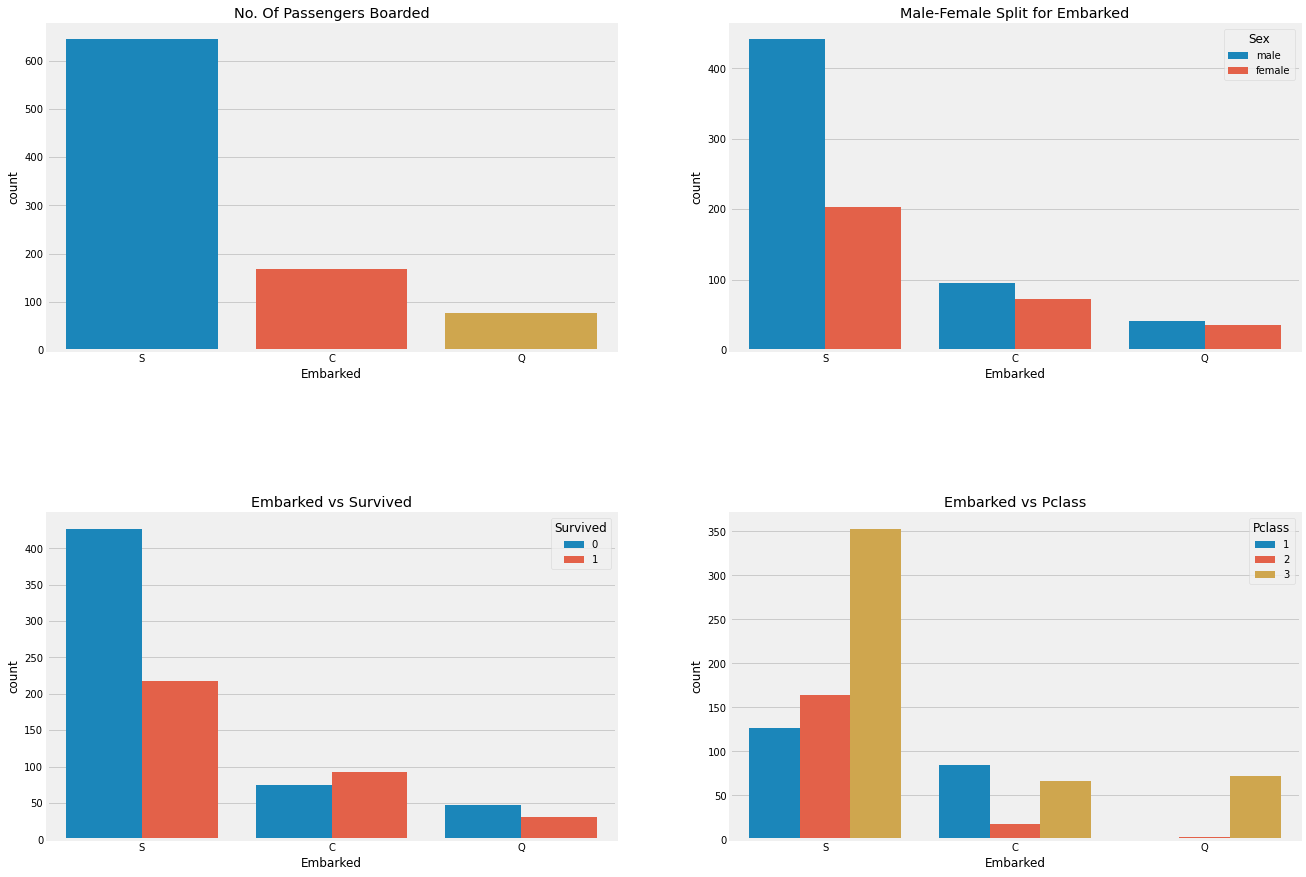

In [23]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot('Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')

sns.countplot('Embarked',hue = 'Pclass', data=data, ax=ax[1,1])
ax[1, 1].set_title('Embarked vs Pclass')


plt.subplots_adjust(wspace= 0.2, hspace=0.5)
plt.show()

### Observation:

    - 1. 가장 많은 탑승한 곳은 S이고 그곳에서 탄 사람들은 3등급 칸에 많이 탑승했어
    - 2. C에서 탄 사람들은 죽은 사람보다 산 사람이 더 많아


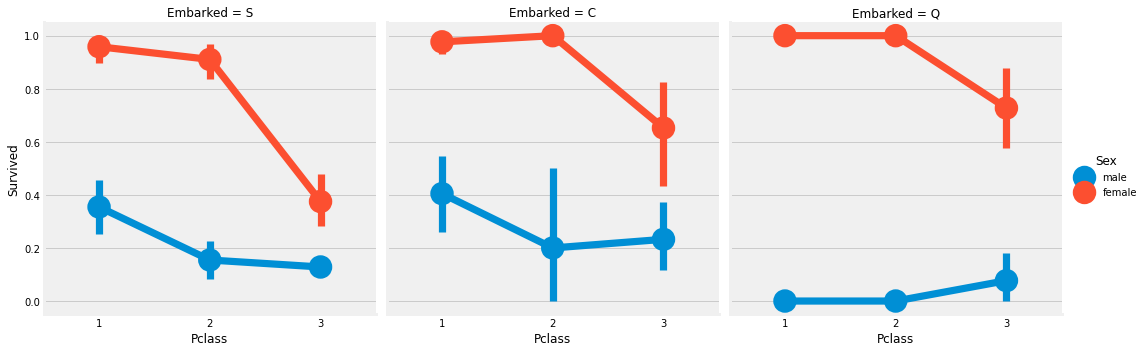

In [24]:
sns.factorplot(x= 'Pclass', y='Survived' , hue='Sex', col='Embarked', data=data)
plt.show()

# Filling Embarked NaN

In [25]:
data['Embarked'].fillna('S', inplace= True)

In [26]:
data['Embarked'].isnull().any()

False

# SibSip -> Discrete Feature

In [27]:
pd.crosstab(data.SibSp, data.Survived).style.background_gradient('summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


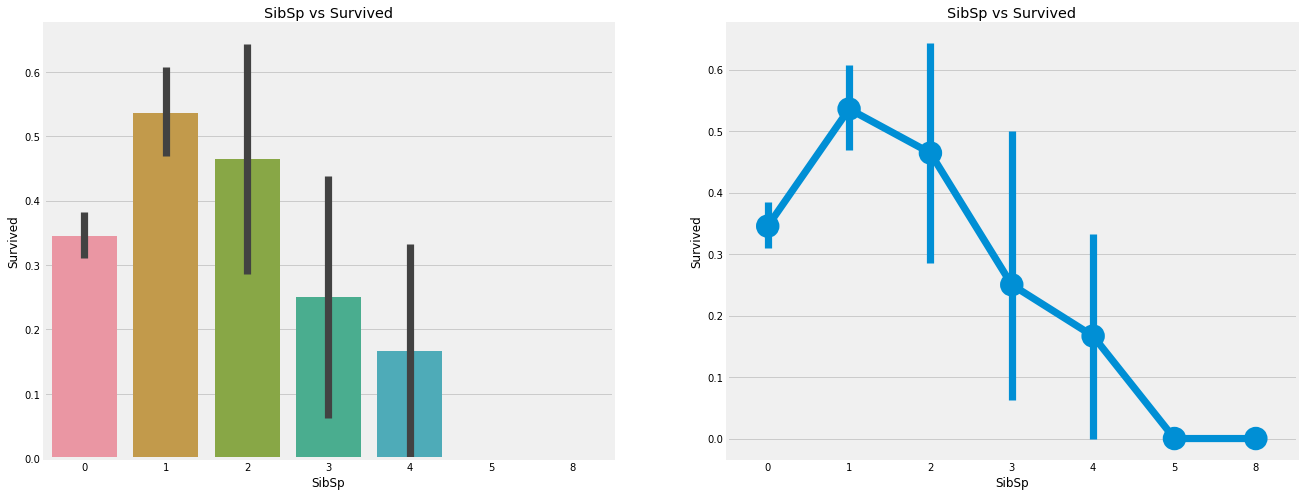

In [28]:
f, ax = plt.subplots(1, 2, figsize= (20, 8))

sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)  # 메모리 관리하기 위해 현재 figure 닫아줘!
plt.show()

In [29]:
pd.crosstab(data.SibSp, data.Pclass, margins=True).style.background_gradient('summer_r')

Pclass,1,2,3,All
SibSp,,,,
0,137,120,351,608
1,71,55,83,209
2,5,8,15,28
3,3,1,12,16
4,0,0,18,18
5,0,0,5,5
8,0,0,7,7
All,216,184,491,891


# Parch

In [30]:
pd.crosstab(data.Parch, data.Pclass, margins=True).style.background_gradient('Set3')

Pclass,1,2,3,All
Parch,,,,
0,163,134,381,678
1,31,32,55,118
2,21,16,43,80
3,0,2,3,5
4,1,0,3,4
5,0,0,5,5
6,0,0,1,1
All,216,184,491,891


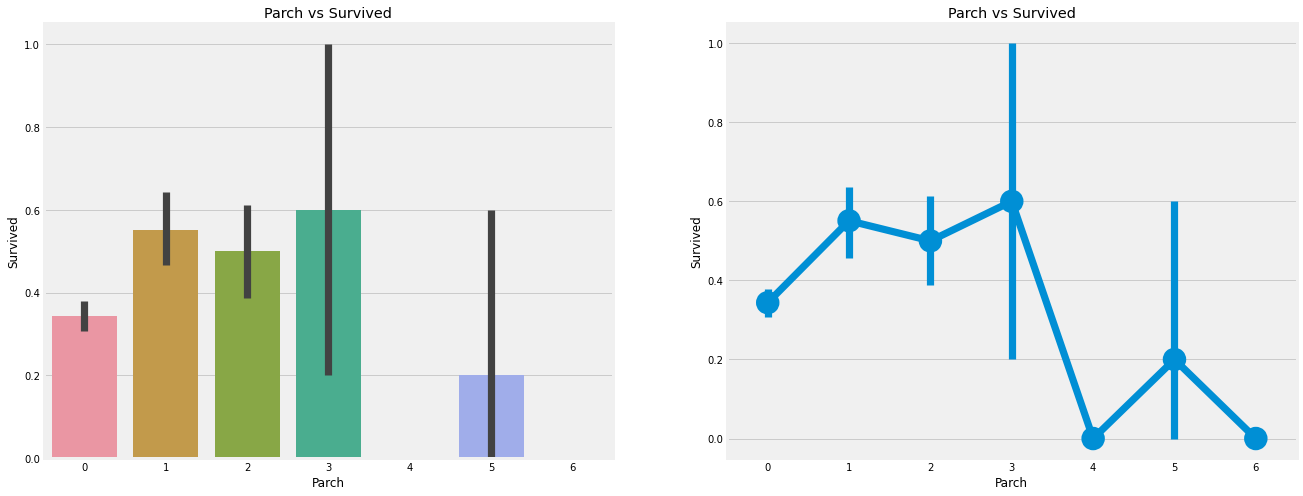

In [31]:

f, ax = plt.subplots(1, 2, figsize= (20, 8))
sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.close(2)
plt.show()

# Fare -> Continuous Feature

In [32]:
print('Highest Fare was : ', data['Fare'].max())
print('Lowest Fare was : ', data['Fare'].min())
print('Average Fare was : ', data['Fare'].mean())

Highest Fare was :  512.3292
Lowest Fare was :  0.0
Average Fare was :  32.2042079685746


Text(0.5, 1.0, 'Fares in Pclass 3')

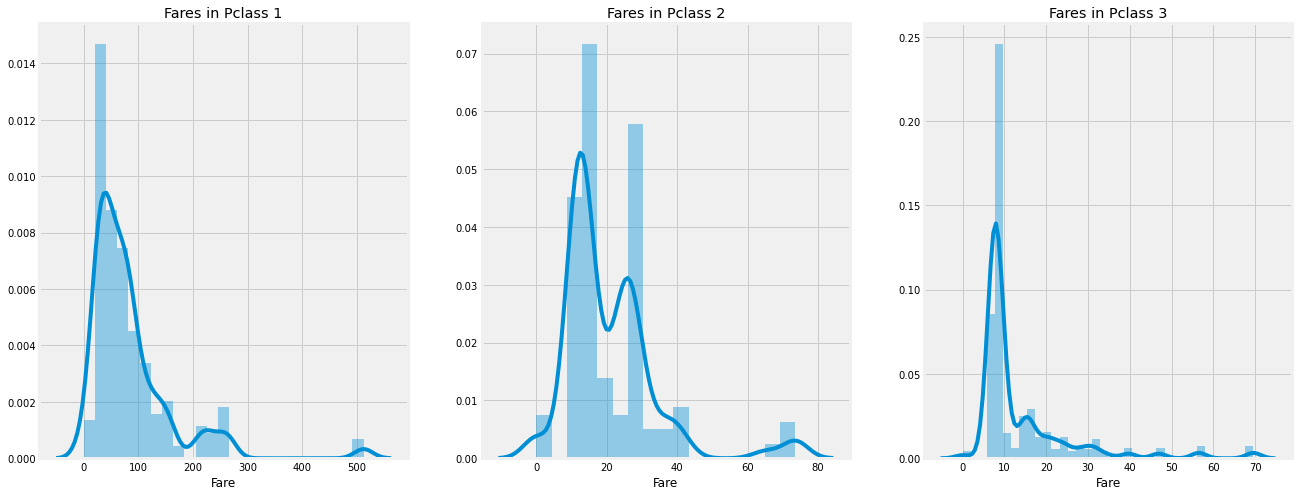

In [33]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.distplot(data[data['Pclass'] == 1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass'] == 2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass'] == 3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

# Correlation Between The Features

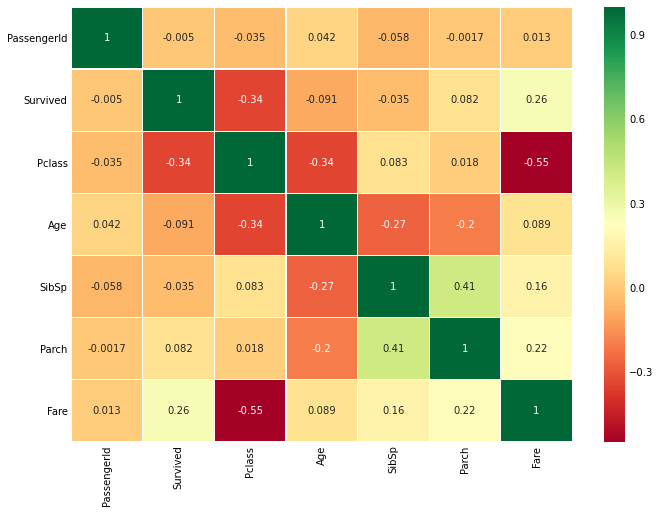

In [34]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)

fig=plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

# Part2 : Feature Engineering and Data Cleaning

## Age_band

In [35]:
data['Age_band']=0

data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4

data.head()




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


to_frame() - 데이터프레임 형태로 보여줌

In [36]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_band
1,382
2,325
0,104
3,69
4,11


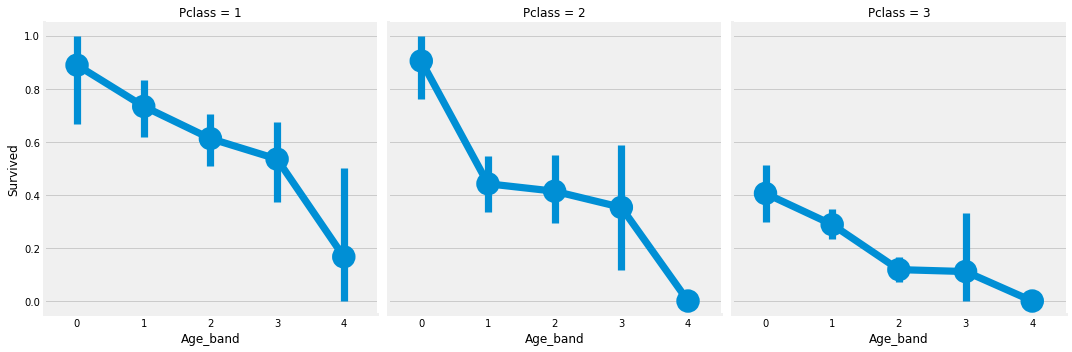

In [37]:
sns.factorplot('Age_band', 'Survived', data= data, col='Pclass')
plt.show()

## Family_Size and Alone

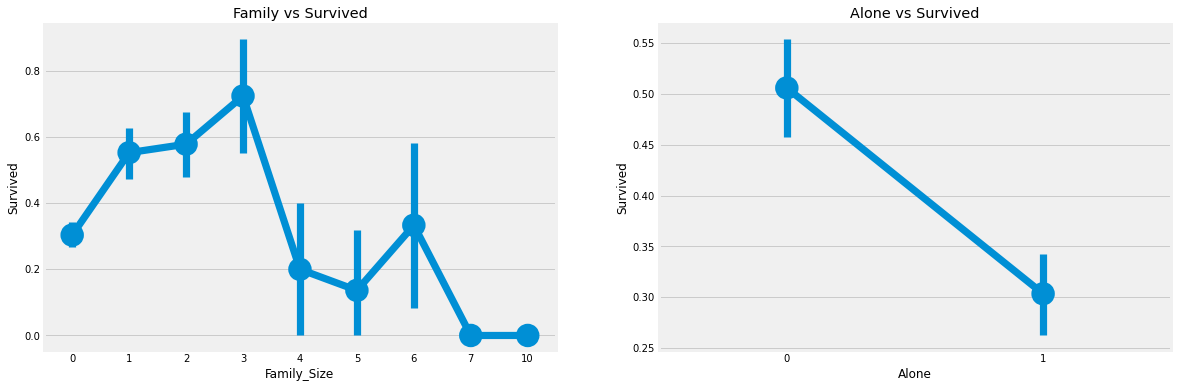

In [38]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp'] # family_size
data['Alone']=0
data.loc[data.Family_Size == 0, 'Alone']= 1         # Alone

f, ax= plt.subplots(1, 2, figsize=(18, 6))
sns.factorplot('Family_Size', 'Survived', data=data, ax = ax[0])
ax[0].set_title('Family vs Survived')

sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.close(2)
plt.close(3)
plt.show()

- Family_Size=0 means that the passenger is alone. Clearly, if you are alone or family_size=0, then chances for survival is very low. for family size > 4, the chances decrease too. This also looks to be an important feature for the model. Lets examine this further.

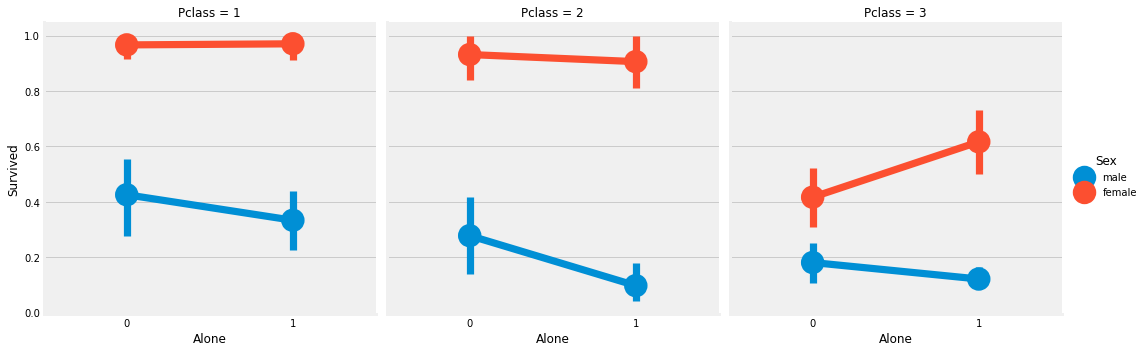

In [39]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

# Fare_Range


- pandas.qcut

In [40]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


- As discussed above, we can clearly see that as the fare_range increases, the chances of survival increases.
- Now we cannot pass the Fare_Range values as it is. We should convert it into singleton values same as we did in Age_Band

In [41]:
data['Fare_cat'] = 0
data.loc[(data['Fare'] <= 7.91), 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_cat']= 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31.0), 'Fare_cat']= 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 513), 'Fare_cat']= 3

In [42]:
data['Fare_cat'].value_counts()

2    229
0    223
3    222
1    217
Name: Fare_cat, dtype: int64

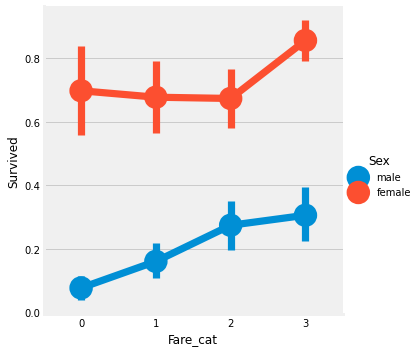

In [43]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

# Converting String Values into Numeric

- Since we cannot pass strings to a machine learning model, we need to convert features loke Sex, Embarked, etc into numeric values

In [44]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0,1, 2], inplace = True)
data['Initial'].replace(['Mr', 'Mrs','Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace = True)


## Droppinbg UnNeeded Features

- Name -> We don't need name feature as it cannot be converted into any categorical value.
- Age -> We have the Age_band feature, so no need of this.
- Ticket -> It is any random string that cannot be categoried.
- Fare -> We have the Fare_cat feature. so unneeded
- Cabin -> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.
- Fare_Range -> We have fare_cat feature.
- PassengerId -> Cannot be categoried.

In [45]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Initial', 'Age_band',
       'Family_Size', 'Alone', 'Fare_Range', 'Fare_cat'],
      dtype='object')

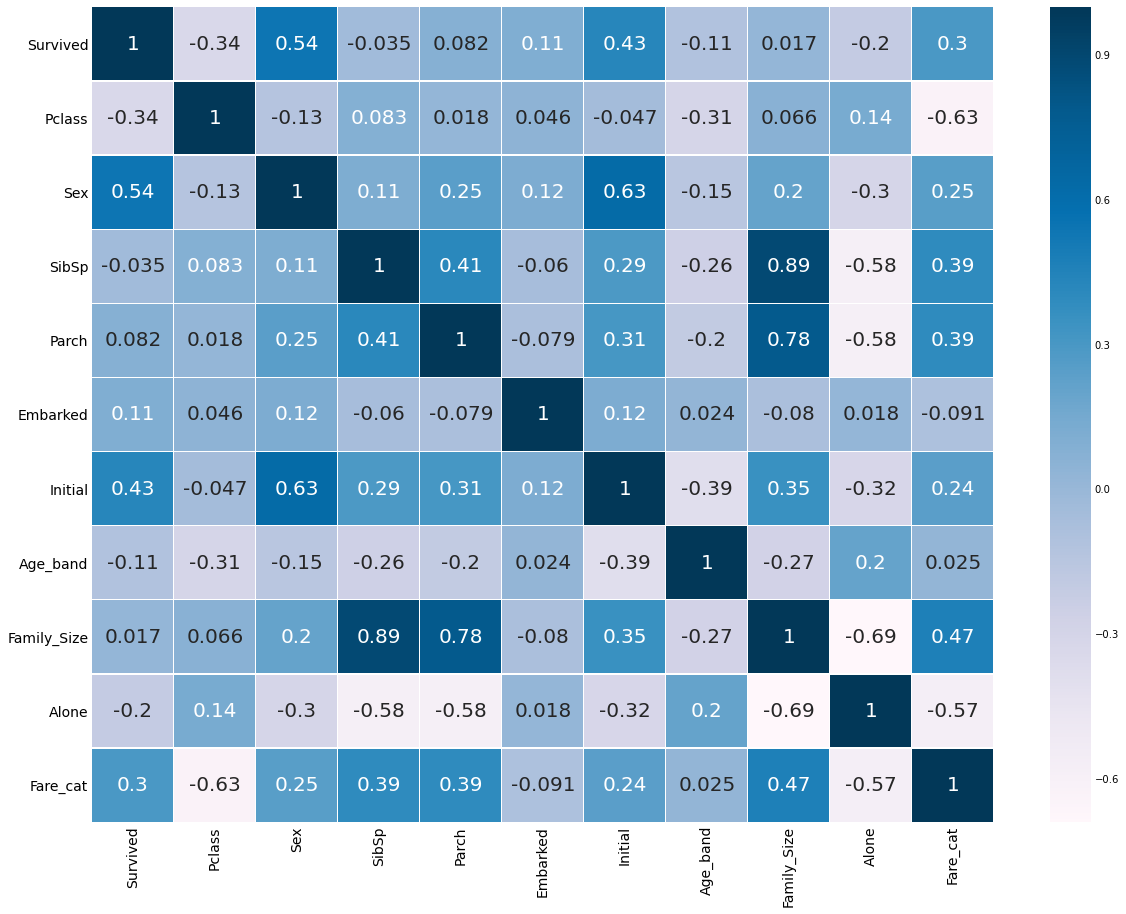

In [46]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'], axis=1, inplace= True)

sns.heatmap(data.corr(), annot=True, cmap = 'PuBu', linewidths=0.2, annot_kws={'size':20})

fig=plt.gcf()
fig.set_size_inches(18 , 15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Part:3 Predictive Modeling

    1) Logistic Regression
    2) Support Vector Machine
    3) Random Forest
    4) K-Nearest Neighbors
    5) Naive Bayes
    6) Decision Tree
    7) Logistic Regression

In [47]:
# import all the required ML packages

from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [48]:
train, test=  train_test_split(data, test_size = 0.3, random_state=42, stratify=data['Survived'])

train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]

test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]

X= data[data.columns[1:]]
Y= data['Survived']


## Radial Support Vector Machine

In [53]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)

print('Accuracy for rbf SVM is', metrics.accuracy_score(prediction1, test_Y))


Accuracy for rbf SVM is 0.8208955223880597


## Linear Support Vector Machine(linear-SVM)

In [56]:
model = svm.SVC(kernel='linear', C=0.1, gamma= 0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2, test_Y))


Accuracy for rbf SVM is 0.8022388059701493


## Logistic Regression

In [57]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)

print('Accuracy for Logiscic Regression is', metrics.accuracy_score(prediction3, test_Y))


Accuracy for Logiscic Regression is 0.8134328358208955


 ## Decision Tree
 

In [59]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)

print('Accuracy for DecisionTree is', metrics.accuracy_score(prediction4, test_Y))


Accuracy for DecisionTree is 0.7947761194029851


## K-Nearest Neighbors(KNN)

In [62]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)

print('Accuracy for linear KNN is', metrics.accuracy_score(prediction5, test_Y))



Accuracy for linear KNN is 0.7835820895522388


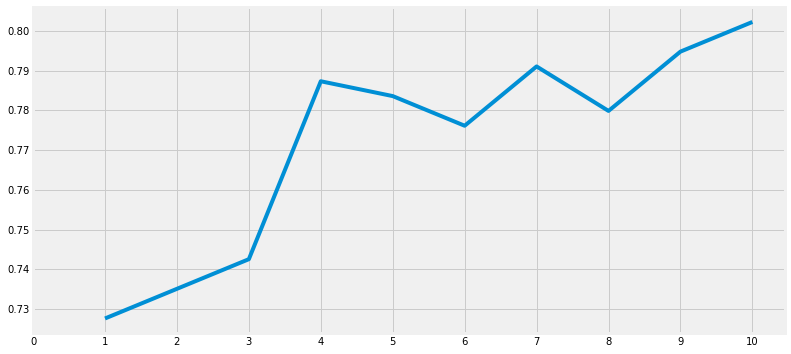

Accuracies for different values of n are: [0.72761194 0.73507463 0.74253731 0.78731343 0.78358209 0.7761194
 0.79104478 0.77985075 0.79477612 0.80223881] with the max value as  0.8022388059701493


In [63]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

## Gaussian Naive Bayes

In [64]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


## RandomForest

In [65]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))


The accuracy of the Random Forests is 0.7873134328358209


## Cross Validation

In [68]:
from sklearn.model_selection import KFold # for K-fold cross validation
from sklearn.model_selection import cross_val_score # score validation
from sklearn.model_selection import cross_val_predict # prediction

kfold = KFold(n_splits=10, random_state= 22, shuffle=True)
xyz= []
accuracy = []
std = []

classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),
        svm.SVC(kernel='rbf'),
        LogisticRegression(),
        KNeighborsClassifier(n_neighbors=9),
        DecisionTreeClassifier(),
        GaussianNB(),
        RandomForestClassifier(n_estimators=100)]

for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv = kfold, scoring='accuracy')
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean' : xyz,
                                   'Std' : std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.040287
Decision Tree,0.803608,0.047922
Naive Bayes,0.795843,0.054861
Random Forest,0.814869,0.041504


<AxesSubplot:>

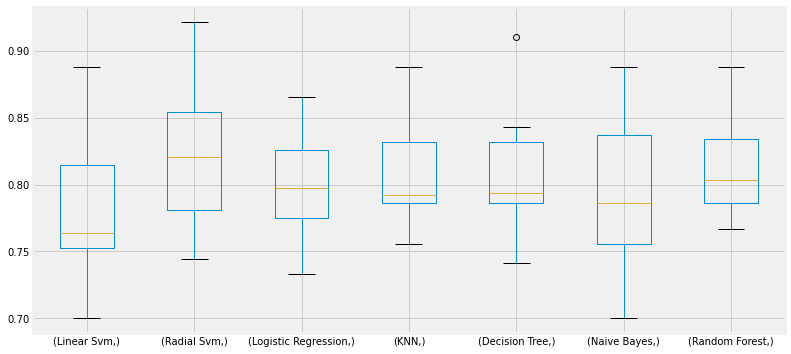

In [70]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

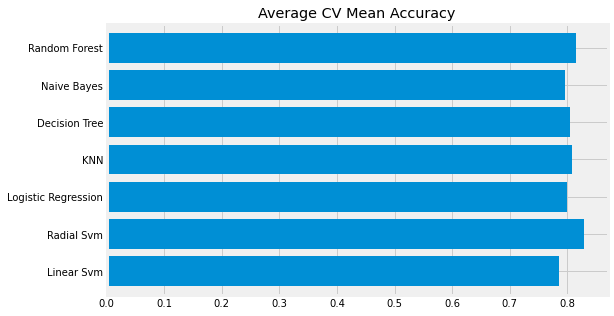

In [73]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

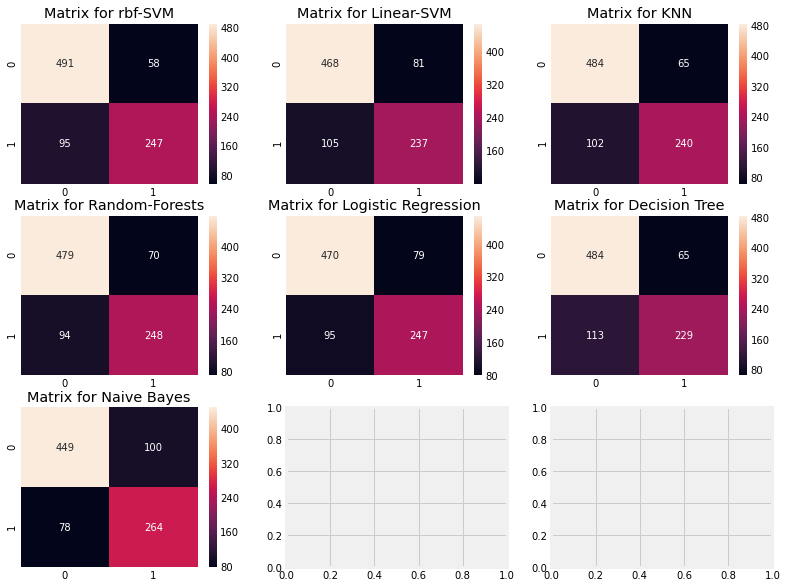

In [74]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

## Grid Search

In [75]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


In [76]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


# Ensemble

## Voting Classifier

- soft voting (voting='soft')
    분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결과값으로 선정
- hard voting (voting='hard')
    예측 결과값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결과값으로 선정하는 것( 다수결의 원칙 )

In [77]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)

print('The accuracy for ensembled model is : ', ensemble_lin_rbf.score(test_X, test_Y))
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring='accuracy')

print('The cross validated score is', cross.mean())

The accuracy for ensembled model is :  0.8171641791044776
The cross validated score is 0.8249188514357053


## Bagging

### bagged KNN

In [79]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state= 0, n_estimators=700)
model.fit(train_X, train_Y)
prediction=model.predict(test_X)

print('The accuracy for bagged KNN is: ', metrics.accuracy_score(prediction, test_Y))
result=cross_val_score(model, X, Y, cv=10, scoring='accuracy')

print('The cross validated score for bagged KNN is: ', result.mean())

The accuracy for bagged KNN is:  0.7947761194029851
The cross validated score for bagged KNN is:  0.8160424469413232


### bagged DecisionTree

In [80]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.7873134328358209
The cross validated score for bagged Decision Tree is: 0.8171410736579275


# Boosting


## AdaBoosting(Adaptive Boosting)
- The weak learner or estimator in this case is a Decision Tree. But we can change the default base_estimatir to any algorithm of our choice

In [81]:
from sklearn.ensemble import AdaBoostClassifier


ada = AdaBoostClassifier(n_estimators=200, random_state= 0, learning_rate = 0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring='accuracy')

print('The cross validated score for AdaBoost is : ', result.mean())

The cross validated score for AdaBoost is :  0.8249188514357055


### GradientBoosting

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


### XGBoost

In [83]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result=cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is : ', result.mean())

The cross validated score for XGBoost is :  0.8160299625468165


In [84]:
n_estimators=list(range(100, 1100, 100))

learn_rate = [0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

params = {'n_estimators' : n_estimators,
         'learning_rate' : learn_rate}

gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=params, verbose=True)
gd.fit(X, Y)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534


AttributeError: 'GridSearchCV' object has no attribute 'best_estimators'

In [86]:
print(gd.best_score_)
print(gd.best_estimator_)

0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


## Feature Importance

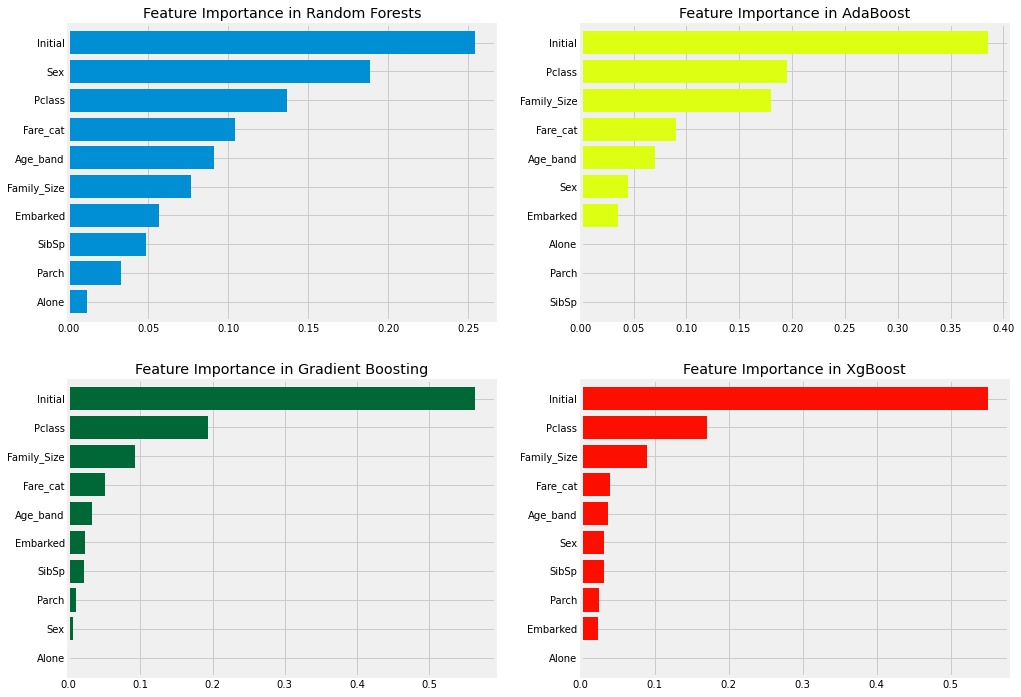

In [87]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()